## Lineare Regression

Zukunfswerte vorhersagen anhand von Vergangenheitsdaten

-> Rote Linie vorhersagen

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Data/SeoulBikeData.csv")

In [3]:
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


Textbasierte Spalten entfernen

In [5]:
df.drop(columns={"Seasons", "Holiday", "Functioning Day"}, inplace=True)

In [6]:
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


Spalten umbenennen

In [10]:
df.rename(columns={"Temperature(°C)": "Temp", "Humidity(%)":"Humidity", "Wind speed (m/s)": "Wind", "Visibility (10m)": "Visibility", "Dew point temperature(°C)": "DewTemp", "Solar Radiation (MJ/m2)": "SolRadiation", "Rainfall(mm)": "Rain", "Snowfall (cm)": "Snow"}, inplace=True)

In [11]:
df

,Date,Rented Bike Count,Hour,Temp,Humidity,Wind,Visibility,DewTemp,SolRadiation,Rain,Snow
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


In [13]:
df = df[df["Hour"] == 12]

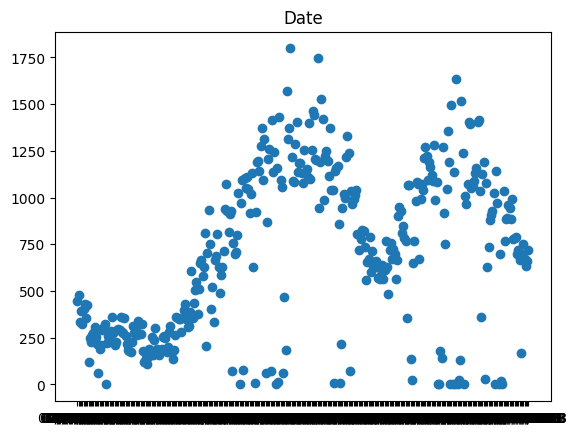

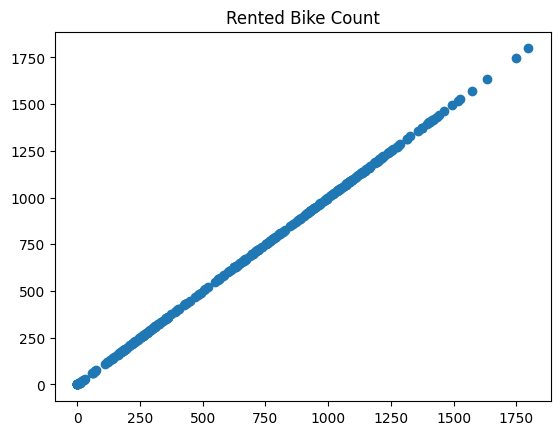

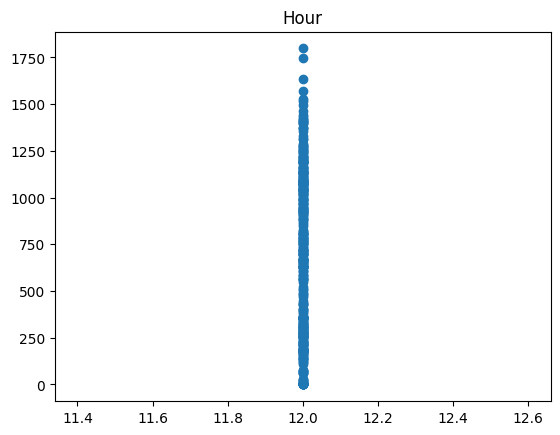

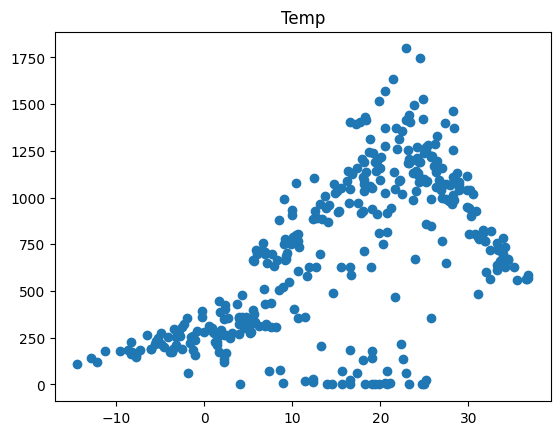

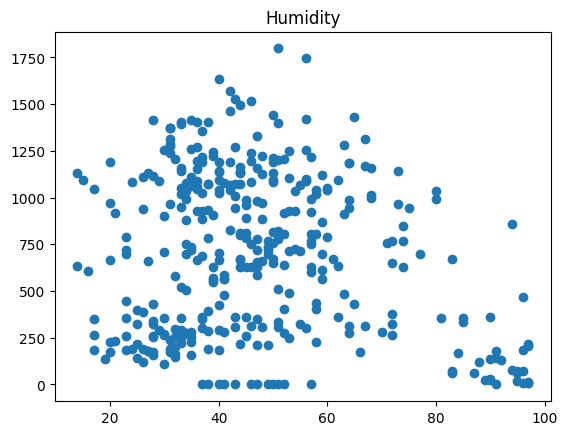

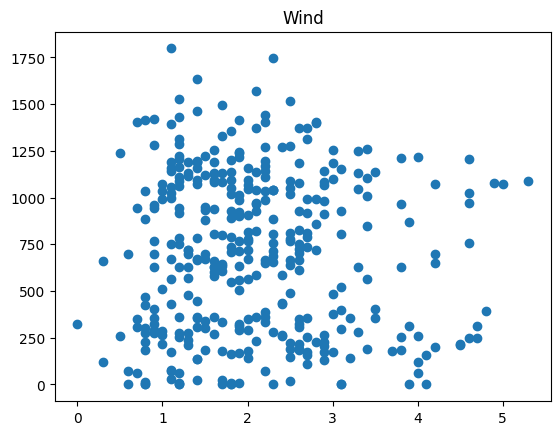

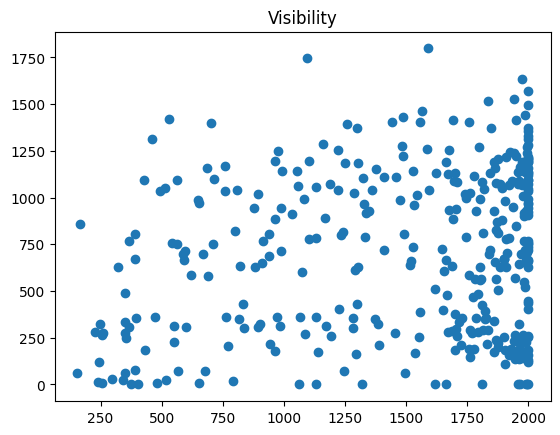

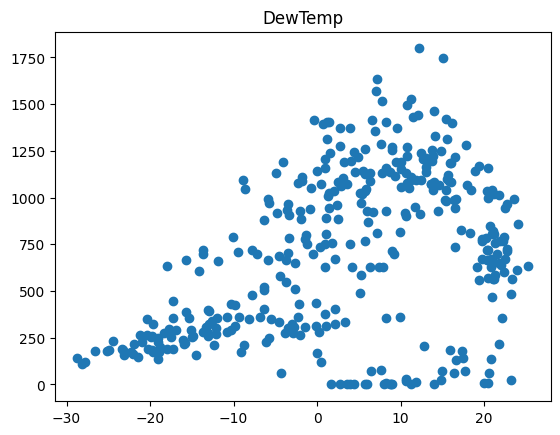

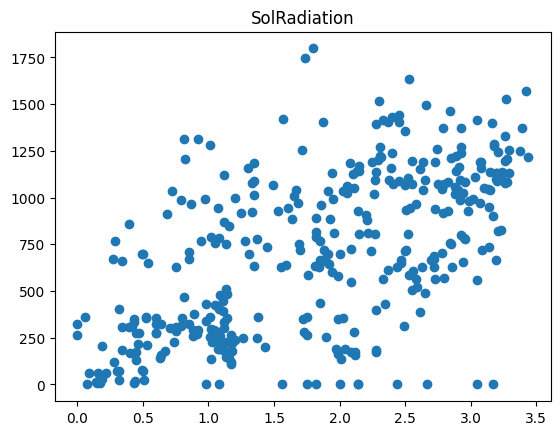

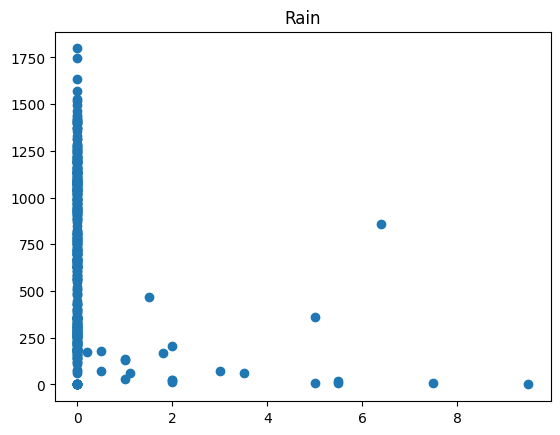

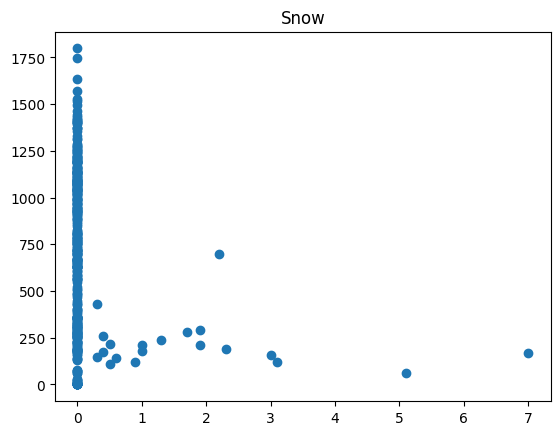

In [14]:
for col in df.columns:
    plt.scatter(df[col], df["Rented Bike Count"])
    plt.title(col)
    plt.show()

In [16]:
df.drop(columns={"Rain", "Snow", "Visibility", "Hour"}, inplace=True)

C:\Users\lk3\AppData\Local\Temp\ipykernel_1736\2413233909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns={"Rain", "Snow", "Visibility", "Hour"}, inplace=True)


In [17]:
df

,Date,Rented Bike Count,Temp,Humidity,Wind,DewTemp,SolRadiation
12,01/12/2017,449,1.7,23,1.4,-17.2,1.11
36,02/12/2017,479,4.3,41,1.3,-7.8,1.09
60,03/12/2017,333,5.8,85,1.7,3.4,0.43
84,04/12/2017,393,-0.3,38,4.8,-12.9,1.11
108,05/12/2017,321,-2.3,25,0.0,-19.7,0.00
...,...,...,...,...,...,...,...
8652,26/11/2018,752,9.1,57,1.1,1.0,1.69
8676,27/11/2018,672,9.3,61,1.5,2.1,0.85
8700,28/11/2018,635,7.9,14,1.7,-18.0,1.81
8724,29/11/2018,661,5.6,27,0.3,-11.9,0.34


In [19]:
df.rename(columns={"Rented Bike Count": "BikeCount"}, inplace=True)

C:\Users\lk3\AppData\Local\Temp\ipykernel_1736\96054375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"Rented Bike Count": "BikeCount"}, inplace=True)


In [20]:
df

,Date,BikeCount,Temp,Humidity,Wind,DewTemp,SolRadiation
12,01/12/2017,449,1.7,23,1.4,-17.2,1.11
36,02/12/2017,479,4.3,41,1.3,-7.8,1.09
60,03/12/2017,333,5.8,85,1.7,3.4,0.43
84,04/12/2017,393,-0.3,38,4.8,-12.9,1.11
108,05/12/2017,321,-2.3,25,0.0,-19.7,0.00
...,...,...,...,...,...,...,...
8652,26/11/2018,752,9.1,57,1.1,1.0,1.69
8676,27/11/2018,672,9.3,61,1.5,2.1,0.85
8700,28/11/2018,635,7.9,14,1.7,-18.0,1.81
8724,29/11/2018,661,5.6,27,0.3,-11.9,0.34


## Datenset aufteilen

Indizes berichtigen

In [25]:
df.index = list(range(1, 366))

In [27]:
training, validierung, test = np.split(df.sample(frac=1), [int(len(df)*0.6), int(len(df)*0.8)])

C:\Users\lk3\source\repos\Python_DataScience_2023_09_11\venv\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [28]:
training

,Date,BikeCount,Temp,Humidity,Wind,DewTemp,SolRadiation
138,17/04/2018,1112,18.0,26,2.2,-1.8,3.03
238,26/07/2018,600,32.0,57,1.6,22.4,1.94
183,01/06/2018,1076,28.2,34,2.6,10.8,3.26
184,02/06/2018,1253,28.3,30,3.0,9.0,3.29
191,09/06/2018,1462,28.2,42,1.4,14.0,2.84
...,...,...,...,...,...,...,...
113,23/03/2018,690,9.3,37,2.3,-4.6,2.72
347,12/11/2018,888,12.3,37,0.8,-1.9,1.93
312,08/10/2018,1238,19.2,31,0.5,1.6,2.40
161,10/05/2018,0,19.8,49,2.3,8.7,3.17


Zuerst schauen wir uns Regression mit nur einer Spalte an

Wir wollen jetzt bei Temperatur im Verhältnis zu Bike Count den Regressor berechnen

In [99]:
def split(data):
    x = data["Temp"].values.reshape(-1, 1)
    y = data["BikeCount"].values.reshape(-1, 1)

    return x, y

In [100]:
training_temp, training_bikeCount = split(training)
valid_temp, valid_bikeCount = split(validierung)
test_temp, test_bikeCount = split(test)

## SciKit-Learn Modell

In [101]:
from sklearn.linear_model import LinearRegression

In [102]:
temp_reg = LinearRegression()

In [103]:
temp_reg.fit(training_temp, training_bikeCount)

LinearRegression()

In [104]:
temp_reg.score(training_temp, training_bikeCount)

0.3250592943292435

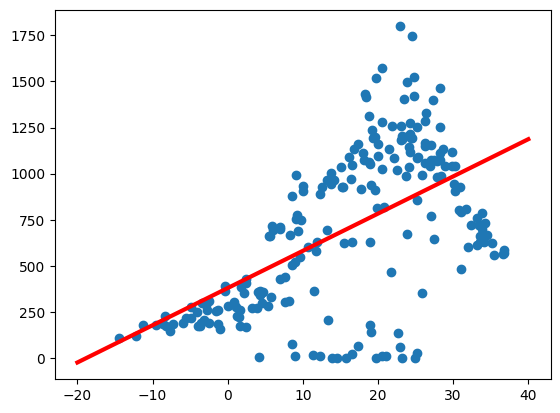

In [105]:
plt.scatter(training_temp, training_bikeCount)
x = np.linspace(-20, 40, 100)
plt.plot(x, temp_reg.predict(x.reshape(-1, 1)), color="red", linewidth=3)

Linie ist nicht aussagekräfig -> Machine Learning

In [106]:
def showPrediction(data, pred):
    temp = data["Temp"].values.reshape(-1, 1)
    bc = data["BikeCount"].values.reshape(-1, 1)
    return pd.DataFrame(np.hstack((temp, bc, pred, bc / pred)))

In [119]:
prediction = showPrediction(df, temp_reg.predict(df["Temp"].values.reshape(-1, 1)))

In [120]:
prediction

,0,1,2,3
0,1.7,449.0,414.037079,1.084444
1,4.3,479.0,466.499148,1.026797
2,5.8,333.0,496.765726,0.670336
3,-0.3,393.0,373.681641,1.051697
4,-2.3,321.0,333.326204,0.963021
...,...,...,...,...
360,9.1,752.0,563.352198,1.334867
361,9.3,672.0,567.387742,1.184375
362,7.9,635.0,539.138935,1.177804
363,5.6,661.0,492.730182,1.341505


In [121]:
prediction.rename(columns={0: "Temp", 1: "Actual", 2: "Prediction", 3: "%"}, inplace=True)

In [124]:
np.array(prediction.loc[prediction["%"] > 1, "%"] ** -1, prediction.loc[prediction["%"] < 1, "%"]).mean()

0.7428645654612536

## Multiple Lineare Regression

Wir können jetzt mehrere Spalten in die Regression miteinbeziehen

In [131]:
def split(data):
    x = data[data.columns[2:]].values
    y = data["BikeCount"].values.reshape(-1, 1)

    return x, y

In [132]:
training_all, training_bikeCount = split(training)
valid_all, valid_bikeCount = split(validierung)
test_all, test_bikeCount = split(test)

In [133]:
all_reg = LinearRegression()

In [135]:
all_reg.fit(training_all, training_bikeCount)

LinearRegression()

In [136]:
all_reg.score(training_all, training_bikeCount)

0.48924067806024185

In [155]:
predictedBC = all_reg.predict(test_all)

In [165]:
prediction = pd.DataFrame(np.hstack((test_all, test_bikeCount, predictedBC, test_bikeCount / predictedBC)))

In [166]:
prediction.rename(columns={0: "Temp", 1: "Humidity", 2: "Wind", 3: "DewTemp", 4: "SolRadiation", 5: "Actual", 6: "Prediction", 7: "%"}, inplace=True)

In [167]:
prediction

,Temp,Humidity,Wind,DewTemp,SolRadiation,Actual,Prediction,%
0,18.2,15.0,1.6,-8.9,2.27,1095.0,619.253890,1.768257
1,28.4,31.0,2.7,9.6,2.93,1374.0,1021.859726,1.344607
2,-2.3,25.0,0.0,-19.7,0.00,321.0,293.400372,1.094068
3,20.3,34.0,2.6,3.9,2.85,754.0,924.403234,0.815661
4,28.1,73.0,2.1,22.7,0.87,964.0,698.692977,1.379719
...,...,...,...,...,...,...,...,...
68,10.6,72.0,2.0,5.7,0.29,769.0,316.462036,2.429991
69,17.9,32.0,4.6,0.9,3.28,1206.0,865.344094,1.393665
70,-0.8,38.0,1.0,-13.3,0.75,286.0,409.401683,0.698580
71,2.7,33.0,2.7,-12.0,0.60,356.0,372.106514,0.956715


In [168]:
np.array(prediction.loc[prediction["%"] > 1, "%"] ** -1, prediction.loc[prediction["%"] < 1, "%"]).mean()

0.730633104552177

## Regression mit TensorFlow

In [170]:
import tensorflow as tf

Normalizer: Reduziert Outlier

In [172]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)  # Input Shape: 1D-Array ohne Achse
temp_normalizer.adapt(training_temp)

In [173]:
temp_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [174]:
temp_model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss="mean_squared_error")

In [176]:
result = temp_model.fit(
    training_temp, training_bikeCount,
    verbose=1,
    epochs=1000,
    validation_data=(valid_temp, valid_bikeCount))

Epoch 1/1000
7/7 [==============================] - 1s 37ms/step - loss: 676984.5000 - val_loss: 571854.0000
Epoch 2/1000
7/7 [==============================] - 0s 8ms/step - loss: 675728.8750 - val_loss: 570800.7500
Epoch 3/1000
7/7 [==============================] - 0s 9ms/step - loss: 674433.5625 - val_loss: 569750.4375
Epoch 4/1000
7/7 [==============================] - 0s 9ms/step - loss: 673191.3750 - val_loss: 568695.6250
Epoch 5/1000
7/7 [==============================] - 0s 8ms/step - loss: 671841.6875 - val_loss: 567666.7500
Epoch 6/1000
7/7 [==============================] - 0s 10ms/step - loss: 670586.6875 - val_loss: 566629.0625
Epoch 7/1000
7/7 [==============================] - 0s 12ms/step - loss: 669329.3125 - val_loss: 565584.2500
Epoch 8/1000
7/7 [==============================] - 0s 11ms/step - loss: 668042.0000 - val_loss: 564545.5625
Epoch 9/1000
7/7 [==============================] - 0s 12ms/step - loss: 666739.0000 - val_loss: 563524.3125
Epoch 10/1000
7/7 [====

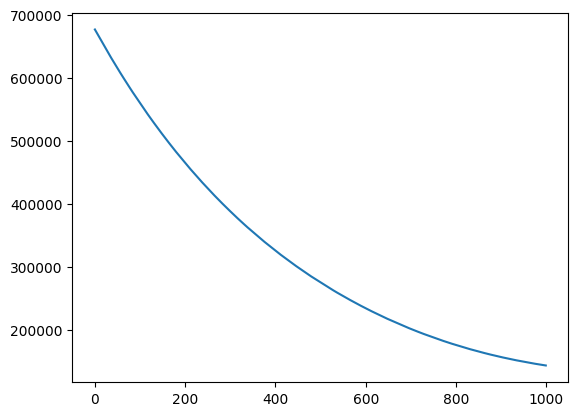

In [177]:
plt.plot(result.history["loss"])

In [182]:
predictedBC = temp_model.predict(test_temp)

3/3 [==============================] - 0s 3ms/step


In [183]:
prediction = pd.DataFrame(np.hstack((test_temp, test_bikeCount, predictedBC, test_bikeCount / predictedBC)))

In [184]:
prediction

,0,1,2,3
0,18.2,1095.0,617.272644,1.773932
1,28.4,1374.0,823.071655,1.669356
2,-2.3,321.0,203.656860,1.576181
3,20.3,754.0,659.642944,1.143043
4,28.1,964.0,817.018738,1.179899
...,...,...,...,...
68,10.6,769.0,463.932129,1.657570
69,17.9,1206.0,611.219666,1.973104
70,-0.8,286.0,233.921448,1.222633
71,2.7,356.0,304.538757,1.168981


In [186]:
prediction.rename(columns={0: "Temp", 1: "Actual", 2: "Prediction", 3: "%"}, inplace=True)

In [187]:
np.array(prediction.loc[prediction["%"] > 1, "%"] ** -1, prediction.loc[prediction["%"] < 1, "%"]).mean()

0.6579430726780694

4/4 [==============================] - 0s 3ms/step


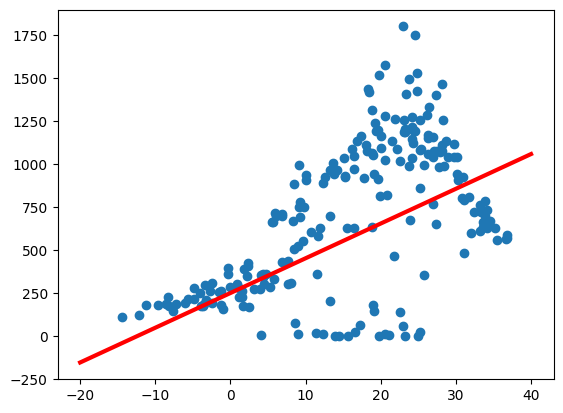

In [188]:
plt.scatter(training_temp, training_bikeCount)
x = np.linspace(-20, 40, 100)
plt.plot(x, temp_model.predict(x.reshape(-1, 1)), color="red", linewidth=3)

## Größeres Model

In [189]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)

In [190]:
all_normalizer.adapt(training_temp.reshape(-1))

In [191]:
all_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [192]:
all_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss="mean_squared_error")

In [195]:
result = all_model.fit(
    training_temp.reshape(-1), training_bikeCount,
    verbose=1,
    epochs=100,
    validation_data=(valid_temp, valid_bikeCount))

Epoch 1/100
7/7 [==============================] - 2s 38ms/step - loss: 676896.9375 - val_loss: 572361.9375
Epoch 2/100
7/7 [==============================] - 0s 11ms/step - loss: 676655.9375 - val_loss: 572141.8125
Epoch 3/100
7/7 [==============================] - 0s 12ms/step - loss: 676375.9375 - val_loss: 571881.5000
Epoch 4/100
7/7 [==============================] - 0s 11ms/step - loss: 676035.3750 - val_loss: 571554.0000
Epoch 5/100
7/7 [==============================] - 0s 11ms/step - loss: 675617.6250 - val_loss: 571134.7500
Epoch 6/100
7/7 [==============================] - 0s 11ms/step - loss: 675078.8750 - val_loss: 570600.9375
Epoch 7/100
7/7 [==============================] - 0s 11ms/step - loss: 674384.0625 - val_loss: 569906.6875
Epoch 8/100
7/7 [==============================] - 0s 11ms/step - loss: 673497.3750 - val_loss: 568998.9375
Epoch 9/100
7/7 [==============================] - 0s 10ms/step - loss: 672332.8125 - val_loss: 567806.5625
Epoch 10/100
7/7 [==========

4/4 [==============================] - 0s 2ms/step


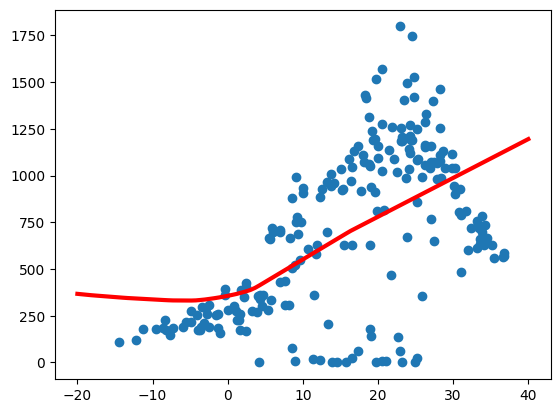

In [196]:
plt.scatter(training_temp, training_bikeCount)
x = np.linspace(-20, 40, 100)
plt.plot(x, all_model.predict(x.reshape(-1, 1)), color="red", linewidth=3)

In [197]:
predictedBC = all_model.predict(test_temp)

3/3 [==============================] - 0s 2ms/step


In [198]:
prediction = pd.DataFrame(np.hstack((test_temp, test_bikeCount, predictedBC, test_bikeCount / predictedBC)))

In [199]:
prediction

,0,1,2,3
0,18.2,1095.0,742.391479,1.474963
1,28.4,1374.0,954.347351,1.439727
2,-2.3,321.0,340.952118,0.941481
3,20.3,754.0,786.029480,0.959252
4,28.1,964.0,948.113342,1.016756
...,...,...,...,...
68,10.6,769.0,565.877502,1.358951
69,17.9,1206.0,736.157410,1.638237
70,-0.8,286.0,350.573059,0.815807
71,2.7,356.0,383.901276,0.927322


In [200]:
prediction.rename(columns={0: "Temp", 1: "Actual", 2: "Prediction", 3: "%"}, inplace=True)

In [201]:
np.array(prediction.loc[prediction["%"] > 1, "%"] ** -1, prediction.loc[prediction["%"] < 1, "%"]).mean()

0.7212615943603488

## Neurales Netz mit allen Spalten

In [202]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(5,), axis=None)

In [203]:
all_normalizer.adapt(training_all)

In [204]:
all_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [205]:
all_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss="mean_squared_error")

In [206]:
result = all_model.fit(
    training_all, training_bikeCount,
    verbose=1,
    epochs=100,
    validation_data=(valid_all, valid_bikeCount))

Epoch 1/100
7/7 [==============================] - 1s 41ms/step - loss: 677008.8125 - val_loss: 572376.6875
Epoch 2/100
7/7 [==============================] - 0s 11ms/step - loss: 676711.3125 - val_loss: 572066.0625
Epoch 3/100
7/7 [==============================] - 0s 11ms/step - loss: 676358.7500 - val_loss: 571684.1250
Epoch 4/100
7/7 [==============================] - 0s 12ms/step - loss: 675919.1875 - val_loss: 571192.6875
Epoch 5/100
7/7 [==============================] - 0s 11ms/step - loss: 675347.3125 - val_loss: 570539.8125
Epoch 6/100
7/7 [==============================] - 0s 11ms/step - loss: 674568.0625 - val_loss: 569676.8125
Epoch 7/100
7/7 [==============================] - 0s 12ms/step - loss: 673562.3125 - val_loss: 568530.1250
Epoch 8/100
7/7 [==============================] - 0s 12ms/step - loss: 672221.3125 - val_loss: 567035.9375
Epoch 9/100
7/7 [==============================] - 0s 11ms/step - loss: 670505.2500 - val_loss: 565074.8750
Epoch 10/100
7/7 [==========

In [207]:
predictedBC = all_model.predict(test_all)

3/3 [==============================] - 0s 3ms/step


In [208]:
prediction = pd.DataFrame(np.hstack((test_all, test_bikeCount, predictedBC, test_bikeCount / predictedBC)))

In [209]:
prediction

,0,1,2,3,4,5,6,7
0,18.2,15.0,1.6,-8.9,2.27,1095.0,963.293213,1.136726
1,28.4,31.0,2.7,9.6,2.93,1374.0,1006.006287,1.365797
2,-2.3,25.0,0.0,-19.7,0.00,321.0,458.252838,0.700487
3,20.3,34.0,2.6,3.9,2.85,754.0,869.661560,0.867004
4,28.1,73.0,2.1,22.7,0.87,964.0,865.929688,1.113254
...,...,...,...,...,...,...,...,...
68,10.6,72.0,2.0,5.7,0.29,769.0,469.309814,1.638576
69,17.9,32.0,4.6,0.9,3.28,1206.0,789.719910,1.527124
70,-0.8,38.0,1.0,-13.3,0.75,286.0,390.111694,0.733123
71,2.7,33.0,2.7,-12.0,0.60,356.0,480.909760,0.740264


In [210]:
prediction.rename(columns={0: "Temp", 1: "Humidity", 2: "Wind", 3: "DewTemp", 4: "SolRadiation", 5: "Actual", 6: "Prediction", 7: "%"}, inplace=True)

In [211]:
np.array(prediction.loc[prediction["%"] > 1, "%"] ** -1, prediction.loc[prediction["%"] < 1, "%"]).mean()

0.7367765959698895

In [212]:
prediction

,Temp,Humidity,Wind,DewTemp,SolRadiation,Actual,Prediction,%
0,18.2,15.0,1.6,-8.9,2.27,1095.0,963.293213,1.136726
1,28.4,31.0,2.7,9.6,2.93,1374.0,1006.006287,1.365797
2,-2.3,25.0,0.0,-19.7,0.00,321.0,458.252838,0.700487
3,20.3,34.0,2.6,3.9,2.85,754.0,869.661560,0.867004
4,28.1,73.0,2.1,22.7,0.87,964.0,865.929688,1.113254
...,...,...,...,...,...,...,...,...
68,10.6,72.0,2.0,5.7,0.29,769.0,469.309814,1.638576
69,17.9,32.0,4.6,0.9,3.28,1206.0,789.719910,1.527124
70,-0.8,38.0,1.0,-13.3,0.75,286.0,390.111694,0.733123
71,2.7,33.0,2.7,-12.0,0.60,356.0,480.909760,0.740264
